In [1]:
#Data set has been obtained from Kaggle Data Sources for Data Analytics
#Following are the questions we will try to answer based on the available data
# 1. Plot number of novels published per month
# 2. Plot number of novels published per year
# 3. Plot number of novels published per category
# 4. Get top authors by the number of novels published by them and look at the time line of them publishing those books
# 5. Plot bifurcation across categories X years [top 10 should be ok]
#available columns are Title, Author, Publication Date and Type

In [2]:
# Few important imports
%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from IPython.display import display, HTML ,display_html
from dateutil.parser import parse

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

Science_Fiction = pd.read_csv('D:\Study Materials\Documents to play with in python\science fiction books\SFF_Dataset.csv',error_bad_lines=False)

In [3]:
#Looking at the data structure

Science_Fiction.head(5)

,Title,Author,Publication Date,Type,Unnamed: 4
0,The Warrior Who Carried Life,Geoff Ryman,1985-05-00,NOVEL,NaN
1,Battle Station,Ben Bova,1987-10-00,COLLECTION,NaN
2,The Astral Mirror,Ben Bova,1985-10-00,COLLECTION,NaN
3,The Winds of Altair,Ben Bova,1973-03-00,NOVEL,NaN
4,Welcome to Moonbase,Ben Bova,1987-11-00,NONFICTION,NaN


In [4]:
#Removing duplicates if any
Science_Fiction.drop_duplicates()

,Title,Author,Publication Date,Type,Unnamed: 4
0,The Warrior Who Carried Life,Geoff Ryman,1985-05-00,NOVEL,NaN
1,Battle Station,Ben Bova,1987-10-00,COLLECTION,NaN
2,The Astral Mirror,Ben Bova,1985-10-00,COLLECTION,NaN
3,The Winds of Altair,Ben Bova,1973-03-00,NOVEL,NaN
4,Welcome to Moonbase,Ben Bova,1987-11-00,NONFICTION,NaN
...,...,...,...,...,...
126490,The Signals to Mars,M. Bower,1957-05-00,SHORTFICTION,NaN
126491,In Hoc Signum Vincit,K. W. Bennett,1957-05-00,SHORTFICTION,NaN
126492,Fillmore Y. Brightforks,Howard Schoenfeld,1957-05-00,SHORTFICTION,NaN
126493,A New Yorker's Plea,Harold Semos,1957-05-00,POEM,NaN


In [5]:
#Looking at the unique values per columns
Science_Fiction.nunique()

Title               105956
Author               23462
Publication Date      4116
Type                     8
Unnamed: 4               1
dtype: int64

In [6]:
#Few Necessary Data Cleaning Steps

# 1. There is one non-date value 'John W. Campbell, Jr.' in publication date column. Remove it
# 2. Date values in publication date column are not consistent in formatting. Re-format them using date util's parse method
# 3. Extract Months and years from publication date column

Science_Fiction.drop(Science_Fiction[Science_Fiction['Publication Date'] == 'John W. Campbell, Jr.'].index, inplace=True)
Science_Fiction['Publication Date'] = Science_Fiction['Publication Date'].apply(lambda x: parse(x.replace('00','01'))) 

Science_Fiction['Publication Date'] = pd.to_datetime(Science_Fiction['Publication Date'], errors='coerce')
Science_Fiction['year'] = pd.DatetimeIndex(Science_Fiction['Publication Date']).year
Science_Fiction['month'] = pd.DatetimeIndex(Science_Fiction['Publication Date']).month

Science_Fiction.head(5)

,Title,Author,Publication Date,Type,Unnamed: 4,year,month
0,The Warrior Who Carried Life,Geoff Ryman,1985-05-01,NOVEL,NaN,1985.0,5.0
1,Battle Station,Ben Bova,1987-10-01,COLLECTION,NaN,1987.0,10.0
2,The Astral Mirror,Ben Bova,1985-10-01,COLLECTION,NaN,1985.0,10.0
3,The Winds of Altair,Ben Bova,1973-03-01,NOVEL,NaN,1973.0,3.0
4,Welcome to Moonbase,Ben Bova,1987-11-01,NONFICTION,NaN,1987.0,11.0


<BarContainer object of 12 artists>

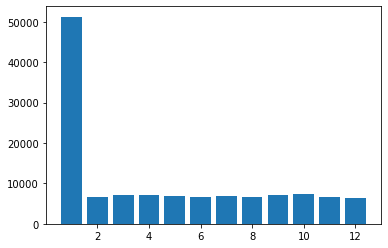

In [7]:
# Answer 1

#Get a new data frame with months X count(novels)

answer_1_df = Science_Fiction['Title'].groupby(Science_Fiction['month']).count()
answer_1_df = DataFrame(answer_1_df)
plt.bar(answer_1_df.index,answer_1_df['Title'])

#Maximum titles have been released in January of every year

<BarContainer object of 246 artists>

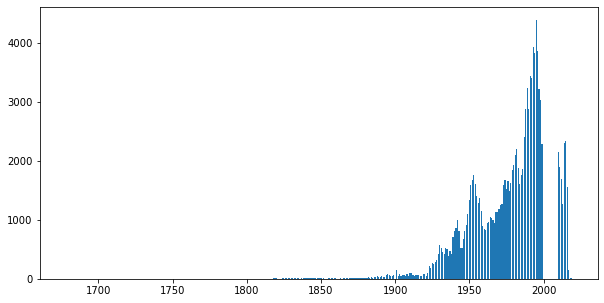

In [8]:
# Answer 2

#Get a new data frame with year X count(novels)

fig = plt.figure(figsize = (10, 5))

answer_2_df = Science_Fiction['Title'].groupby(Science_Fiction['year']).count()
answer_2_df = DataFrame(answer_2_df)
plt.bar(answer_2_df.index,answer_2_df['Title'])

#20th Century has seen a steady rising trend in number of science fiction novels getting published every coming year

<BarContainer object of 7 artists>

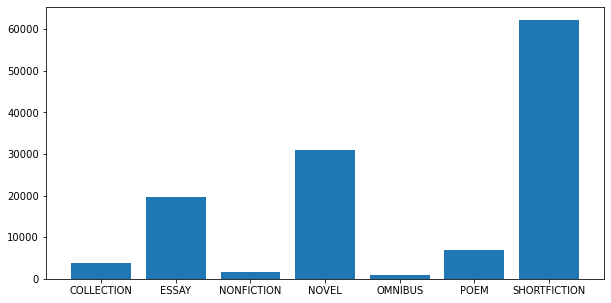

In [9]:
# Answer 3

#Get a new data frame with type X count(novels)

fig = plt.figure(figsize = (10, 5))

answer_3_df = Science_Fiction['Title'].groupby(Science_Fiction['Type']).count()
answer_3_df = DataFrame(answer_3_df)
plt.bar(answer_3_df.index,answer_3_df['Title'])  #height in a bar chart is not a fixed number but the varying values of an attribute you pass

#Essay novels and short fictions have been the top categories of science fiction books

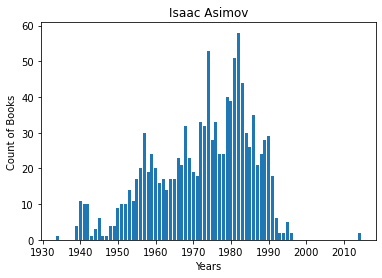

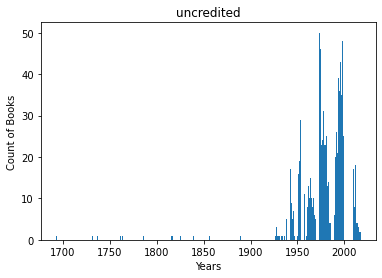

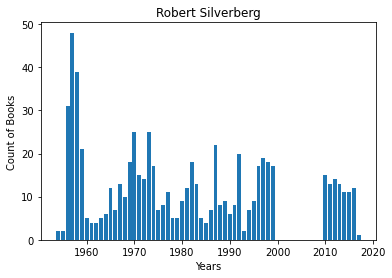

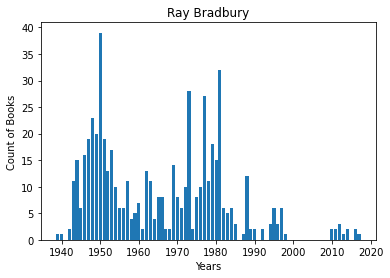

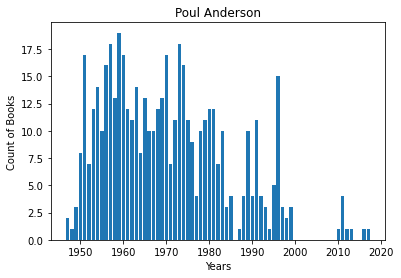

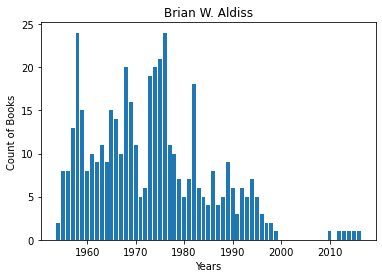

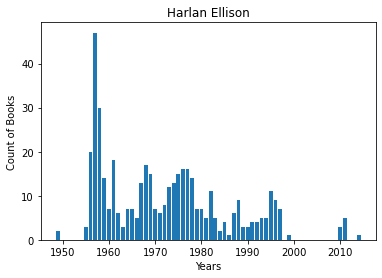

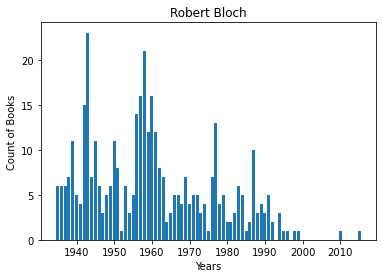

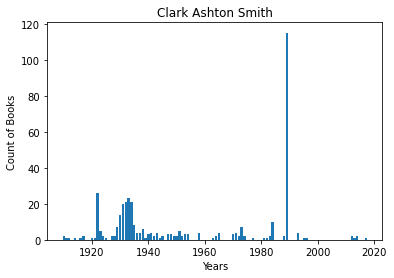

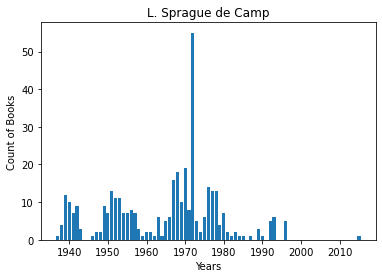

In [10]:
#Answer 4
#In here we are specifically learning to plot charts in a for loop

answer_4_df = Science_Fiction['Title'].groupby(Science_Fiction['Author']).count().sort_values(ascending = False).head(10)
top_10_authors = list(answer_4_df.index)

for authors in list(answer_4_df.index):
    dummy_dataframe = Science_Fiction.loc[Science_Fiction['Author'] == authors]
    dummy_groupby = dummy_dataframe['Title'].groupby(dummy_dataframe['year']).count()
    dummy_groupby = DataFrame(dummy_groupby)
    plt.figure()
    plt.title(authors)
    plt.xlabel('Years')
    plt.ylabel('Count of Books')
    plt.bar(dummy_groupby.index,dummy_groupby['Title'])
    plt.show()   
    

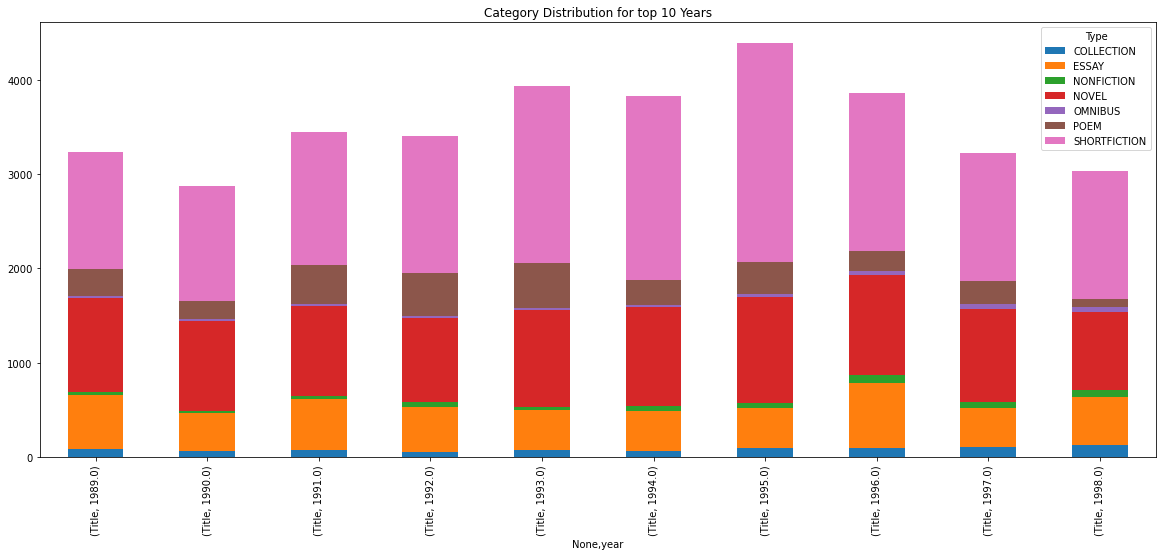

In [11]:
# Answer 5

# In here we are specifically learning to plot stacked bar charts

#Get a new data frame with type X count(novels) X years

top_10_years          = list((Science_Fiction['Title'].groupby(Science_Fiction['year']).count().sort_values(ascending = False).head(10)).index)
data_for_top_10_years = Science_Fiction.loc[Science_Fiction['year'].isin(top_10_years)]
answer_5_df           = data_for_top_10_years['Title'].groupby([data_for_top_10_years['Type'],data_for_top_10_years['year']]).count()
answer_5_df           = DataFrame(answer_5_df).unstack().transpose()
answer_5_df.plot(kind = 'bar',stacked = True,title = 'Category Distribution for top 10 Years',figsize = (20,8))